### Loading required packages and setting up plot configurations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (9,6)
%config InlineBackend.figure_format = 'retina'
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()
fmt = mdates.DateFormatter('%d')
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 0.75
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Arial']
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

### Loading in the data obtained from the Facebook Graph API

In [2]:
posts = pd.read_csv('../data/posts.csv')
posts.index = pd.DatetimeIndex(posts['date'])
del posts['date']
df = posts

likes = pd.read_csv('../data/likes.csv')
likes.index = pd.DatetimeIndex(likes['date'])
del likes['date']

shares = pd.read_csv('../data/shares.csv')
shares.index = pd.DatetimeIndex(shares['date'])
del shares['date']

new_likes = pd.read_csv('../data/new_likes.csv')
new_likes.index = pd.DatetimeIndex(new_likes['date'])
del new_likes['date']

### Number of posts by each party

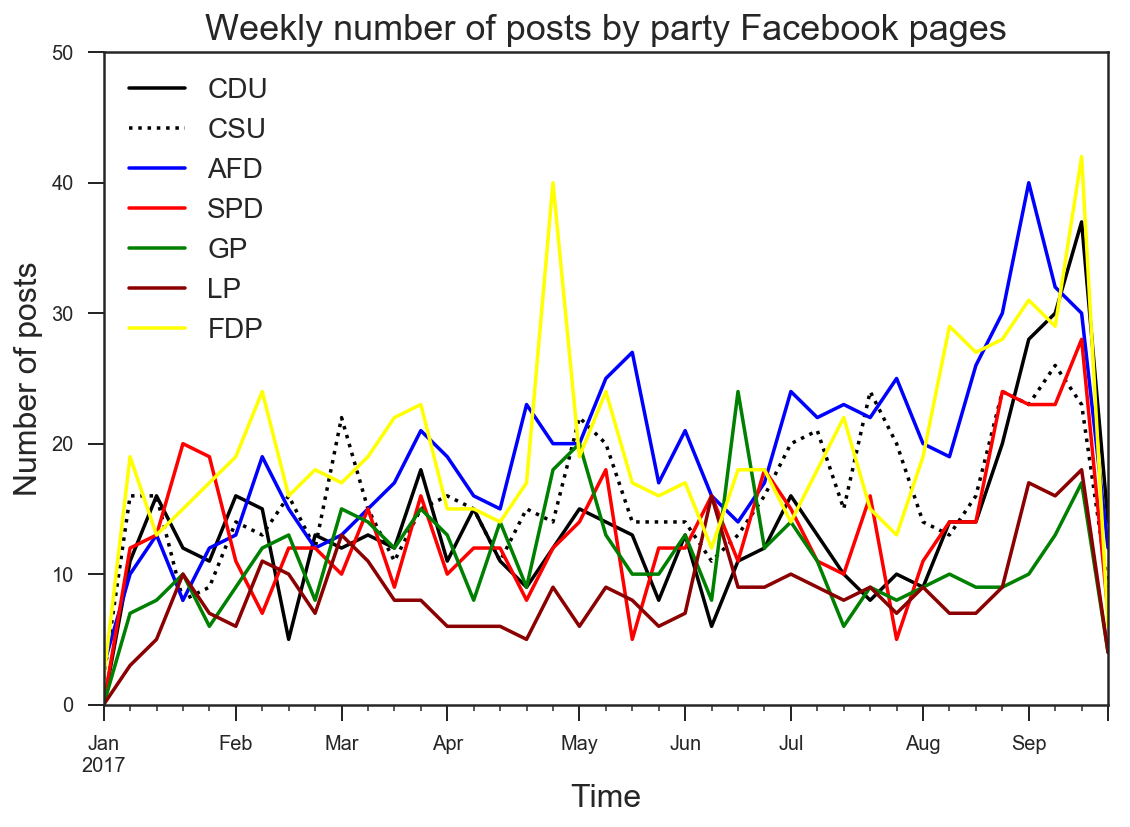

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.ylim(0, 50)
ymin, ymax = ax.get_ylim()
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title('Weekly number of posts by party Facebook pages', fontsize=18, ha='center')
posts.CDU.resample('W').sum().plot(label='CDU',color='black')
posts.CSU.resample('W').sum().plot(label='CSU',color='black', linestyle=':')
posts.AFD.resample('W').sum().plot(label='AFD',color='blue')
posts.SPD.resample('W').sum().plot(label='SPD',color='red')
posts.GP.resample('W').sum().plot(label='GP',color='green')
posts.LP.resample('W').sum().plot(label='LP',color='darkred')
posts.FDP.resample('W').sum().plot(label='FDP',color='yellow')
ax.legend(loc='upper left', shadow=False,fontsize=14)
ax.set_xlabel("Time",size=16)
ax.set_ylabel("Number of posts",size=16)

### Number of likes on these posts

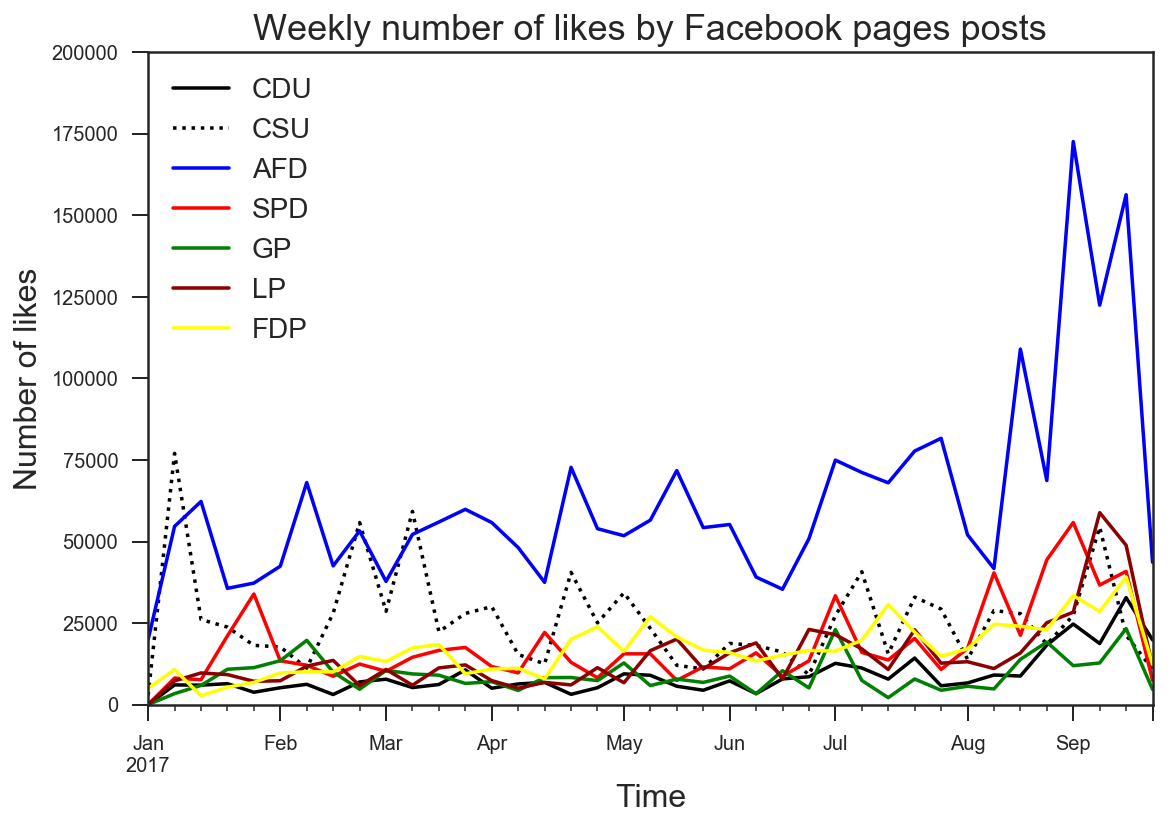

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.ylim(0, 200000)
ymin, ymax = ax.get_ylim()
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title('Weekly number of likes by Facebook pages posts', fontsize=18, ha='center')
likes.CDU.resample('W').sum().plot(label='CDU',color='black')
likes.CSU.resample('W').sum().plot(label='CSU',color='black', linestyle=':')
likes.AFD.resample('W').sum().plot(label='AFD',color='blue')
likes.SPD.resample('W').sum().plot(label='SPD',color='red')
likes.GP.resample('W').sum().plot(label='GP',color='green')
likes.LP.resample('W').sum().plot(label='LP',color='darkred')
likes.FDP.resample('W').sum().plot(label='FDP',color='yellow')
ax.legend(loc='upper left', shadow=False,fontsize=14)
ax.set_xlabel("Time",size=16)
ax.set_ylabel("Number of likes",size=16)

### Cumulative number of likes on these posts

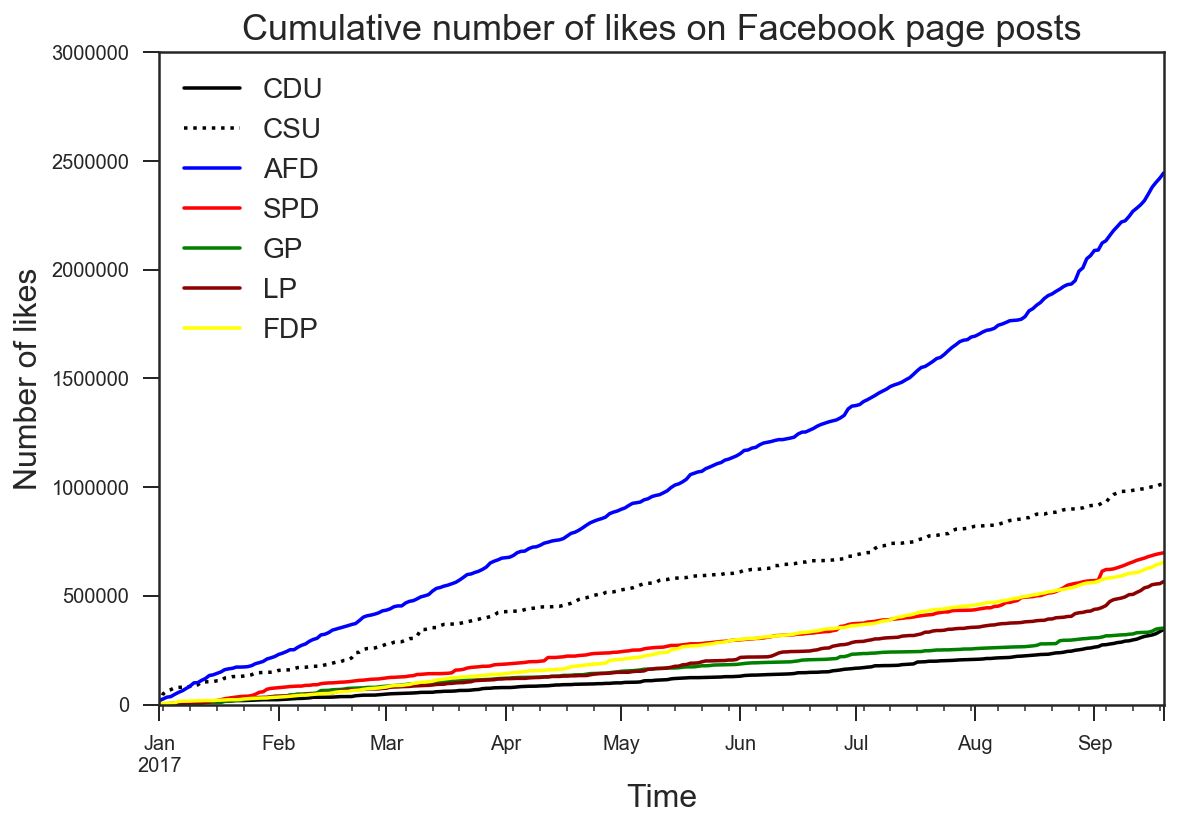

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.ylim(0, 3000000)
ymin, ymax = ax.get_ylim()
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title('Cumulative number of likes on Facebook page posts', fontsize=18, ha='center')
likes.cumsum().CDU.plot(label='CDU',color='black')
likes.cumsum().CSU.plot(label='CSU',color='black', linestyle=':')
likes.cumsum().AFD.plot(label='AFD',color='blue')
likes.cumsum().SPD.plot(label='SPD',color='red')
likes.cumsum().GP.plot(label='GP',color='green')
likes.cumsum().LP.plot(label='LP',color='darkred')
likes.cumsum().FDP.plot(label='FDP',color='yellow')
ax.legend(loc='upper left', shadow=False,fontsize=14)
ax.set_xlabel("Time",size=16)
ax.set_ylabel("Number of likes",size=16)

Now we can look at likes/posts to see if this is just due to frequent posting

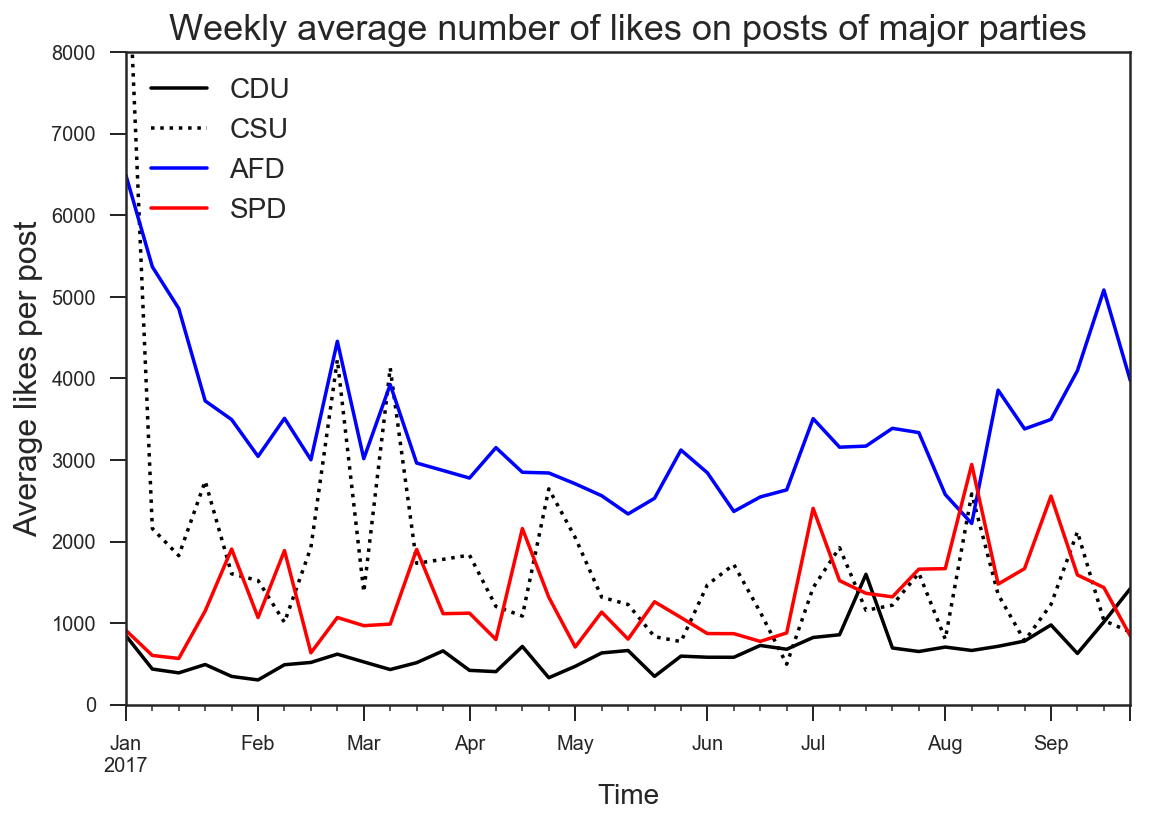

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.ylim(0, 8000)
ymin, ymax = ax.get_ylim()
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title('Weekly average number of likes on posts of major parties', fontsize=18, ha='center')
(likes.CDU.resample('W-MON').sum()/df.CDU.resample('W-MON').sum()).plot(label='CDU',color='black')
(likes.CSU.resample('W-MON').sum()/df.CSU.resample('W-MON').sum()).plot(label='CSU',color='black', linestyle=':')
(likes.AFD.resample('W-MON').sum()/df.AFD.resample('W-MON').sum()).plot(label='AFD',color='blue')
(likes.SPD.resample('W-MON').sum()/df.SPD.resample('W-MON').sum()).plot(label='SPD',color='red')
ax.legend(loc='upper left', shadow=False,fontsize=14)
ax.set_xlabel("Time",size=14)
ax.set_ylabel("Average likes per post",size=16)

### Number of shares of these posts

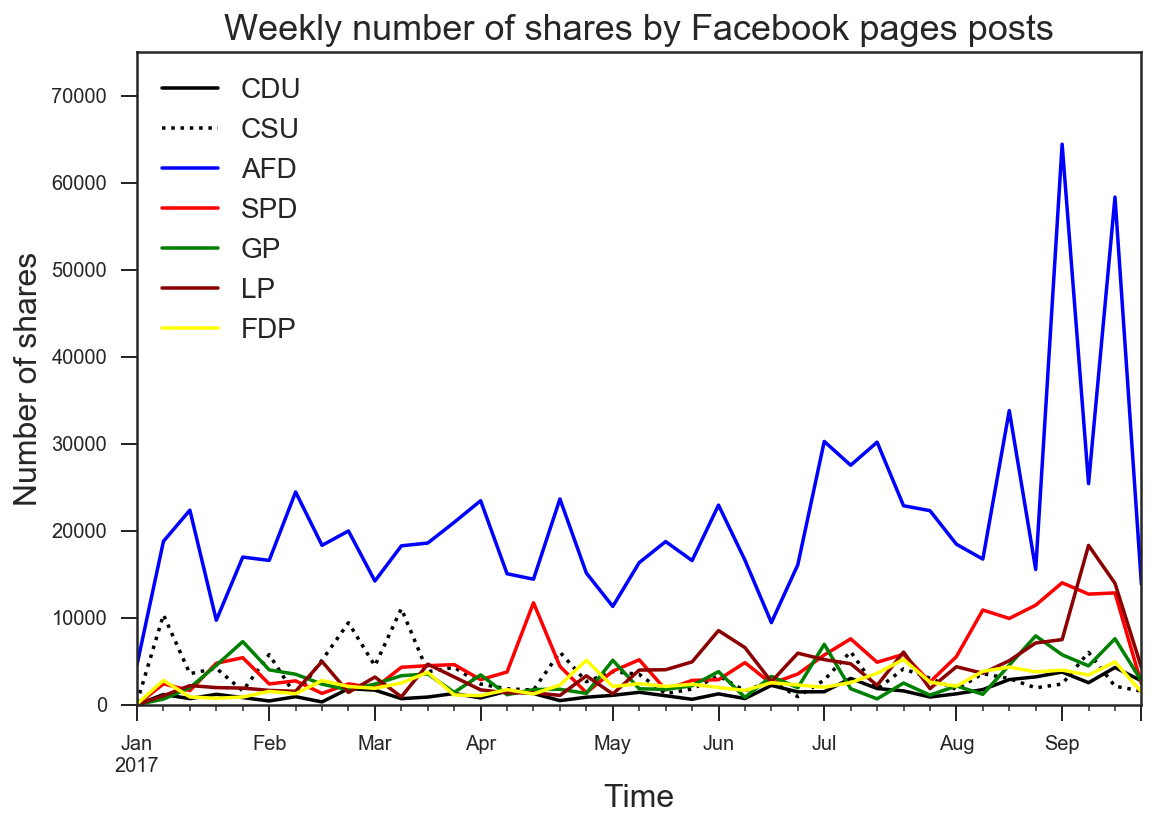

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.ylim(0, 75000)
ymin, ymax = ax.get_ylim()
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title('Weekly number of shares by Facebook pages posts', fontsize=18, ha='center')
shares.CDU.resample('W').sum().plot(label='CDU',color='black')
shares.CSU.resample('W').sum().plot(label='CSU',color='black', linestyle=':')
shares.AFD.resample('W').sum().plot(label='AFD',color='blue')
shares.SPD.resample('W').sum().plot(label='SPD',color='red')
shares.GP.resample('W').sum().plot(label='GP',color='green')
shares.LP.resample('W').sum().plot(label='LP',color='darkred')
shares.FDP.resample('W').sum().plot(label='FDP',color='yellow')
ax.legend(loc='upper left', shadow=False,fontsize=14)
ax.set_xlabel("Time",size=16)
ax.set_ylabel("Number of shares",size=16)

### Cumulative number of shares

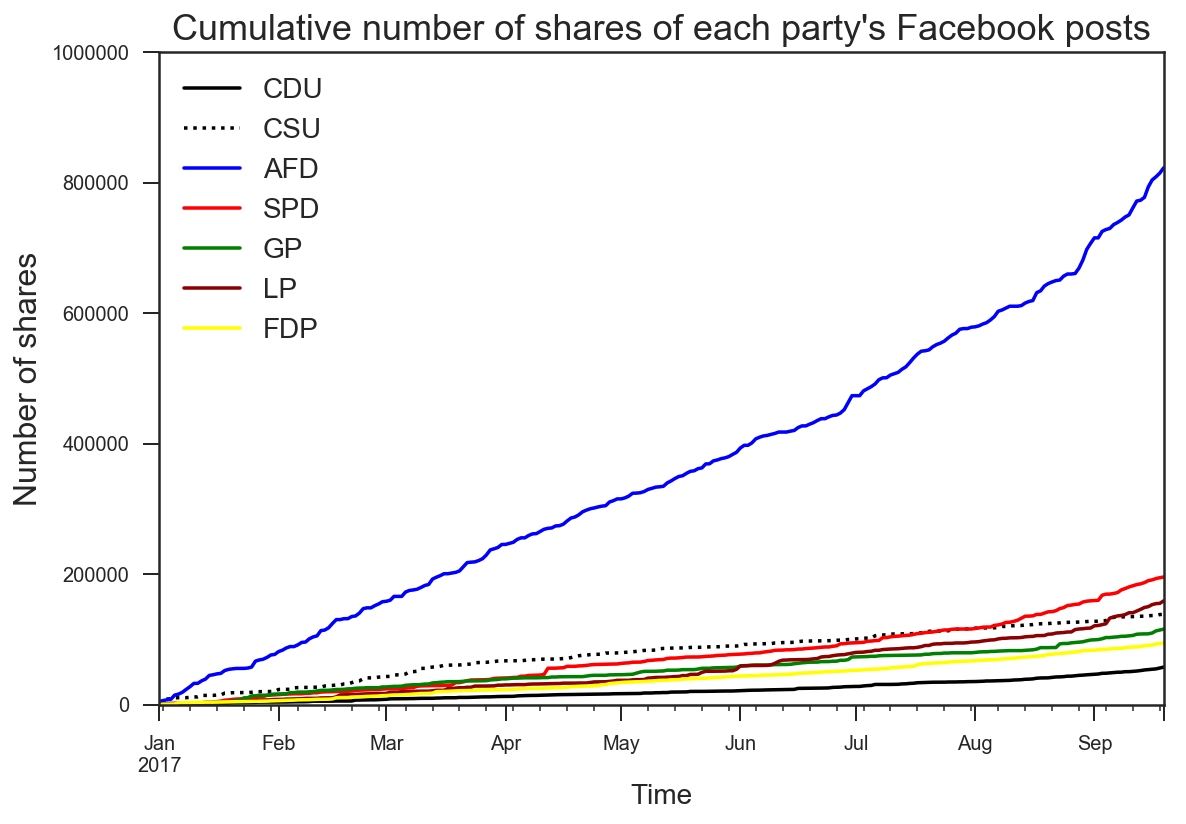

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.ylim(0, 1000000)
ymin, ymax = ax.get_ylim()
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title("Cumulative number of shares of each party's Facebook posts", fontsize=18, ha='center')
shares.CDU.cumsum().plot(label='CDU',color='black')
shares.CSU.cumsum().plot(label='CSU',color='black', linestyle=':')
shares.AFD.cumsum().plot(label='AFD',color='blue')
shares.SPD.cumsum().plot(label='SPD',color='red')
shares.GP.cumsum().plot(label='GP',color='green')
shares.LP.cumsum().plot(label='LP',color='darkred')
shares.FDP.cumsum().plot(label='FDP',color='yellow')
ax.legend(loc='upper left', shadow=False,fontsize=14)
ax.set_xlabel("Time",size=14)
ax.set_ylabel("Number of shares",size=16)

### Number of unqiue likes

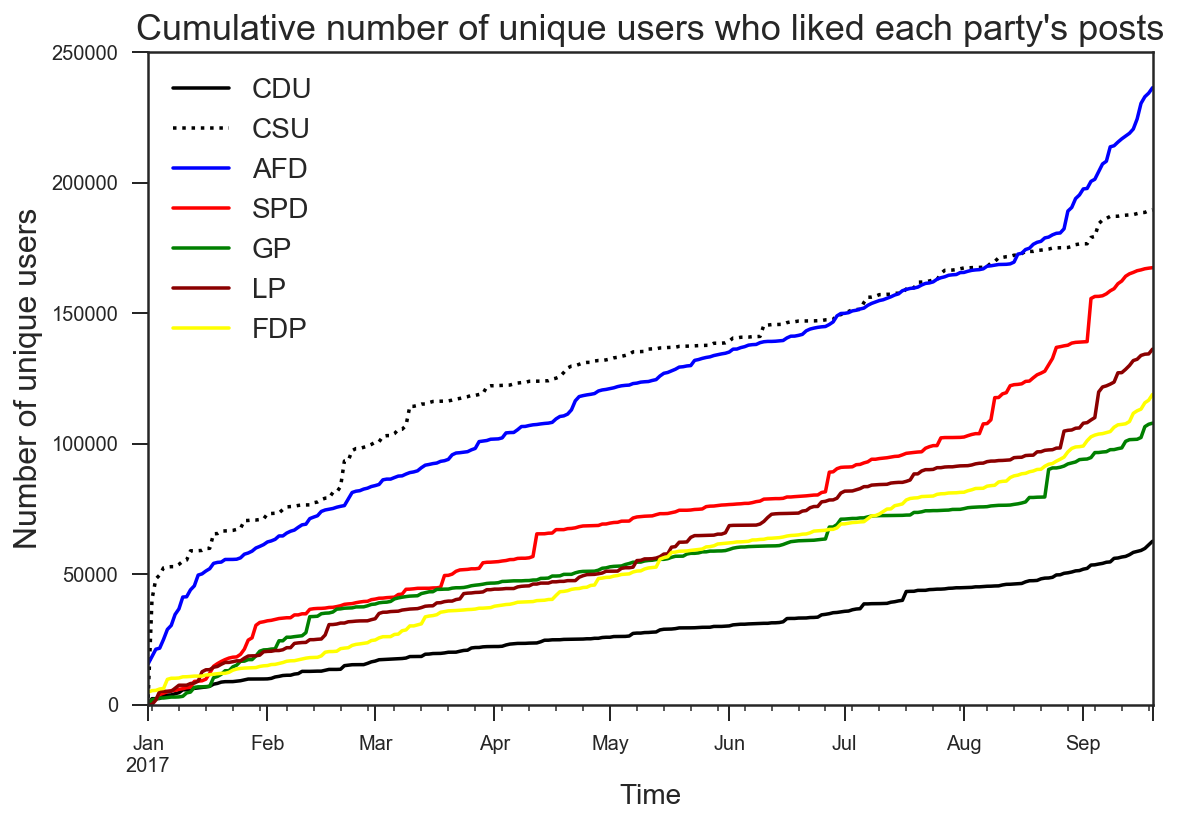

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.ylim(0, 250000)
ymin, ymax = ax.get_ylim()
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title("Cumulative number of unique users who liked each party's posts" , fontsize=18, ha='center')
new_likes.CDU.cumsum().plot(label='CDU',color='black')
new_likes.CSU.cumsum().plot(label='CSU',color='black', linestyle=':')
new_likes.AFD.cumsum().plot(label='AFD',color='blue')
new_likes.SPD.cumsum().plot(label='SPD',color='red')
new_likes.GP.cumsum().plot(label='GP',color='green')
new_likes.LP.cumsum().plot(label='LP',color='darkred')
new_likes.FDP.cumsum().plot(label='FDP',color='yellow')
ax.legend(loc='upper left', shadow=False,fontsize=14)
ax.set_xlabel("Time",size=14)
ax.set_ylabel("Number of unique users",size=16)